## CFChemDb demo - cheminformatics db and development system
Jeremy Yang

Common Fund Data Ecosystem (CFDE)

* https://github.com/nih-cfde
* https://github.com/druggablegenome/idg-cfde
* https://github.com/jeremyjyang/rdkit-tools

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn3

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

import rdktools
import rdktools.db
import rdktools.util

In [2]:
dbcon = rdktools.util.db.Connect("localhost", 5432, "cfchemdb", "www", "foobar")

In [3]:
rdktools.util.db.ListTablesRowCounts(dbcon)

,schema,table,rowcount
0,public,glygen,33531
0,public,refmet,154676
0,public,idg,251677
0,public,mols,308206
0,public,reprotox,965
0,public,lincs,32469


In [4]:
rdktools.util.db.ListColumns(dbcon)

,schema,table,column_name,data_type
0,public,glygen,glycan_type,character varying
1,public,glygen,mass_pme,double precision
2,public,glygen,number_monosaccharides,integer
3,public,glygen,fully_determined,character varying
4,public,glygen,wurcs,character varying
...,...,...,...,...
5,public,lincs,inchi_key,character varying
6,public,lincs,compound_aliases,character varying
7,public,lincs,sig_count,integer
8,public,lincs,cansmi,character varying


### Example data from each dataset

* __IDG__

In [5]:
idg_sample = pd.read_sql("SELECT * FROM idg WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
idg_sample

,pubchem_cid,smiles,target_count,activity_count,cansmi,mol_id
0,11409030,CNc1nc(SC)nc2c1ncn2[C@H]3C[C@H](OP(=O)(O)O)[C@...,1,1,CNc1nc(SC)nc2c1ncn2[C@H]1C[C@H](OP(=O)(O)O)[C@...,191383
1,78103720,CS(=N)(=O)CCCCOc1ccc2ncc(c3oc4ccccc4c3)n2n1,1,1,CS(=N)(=O)CCCCOc1ccc2ncc(-c3cc4ccccc4o3)n2n1,269490
2,134153714,CC(C)C[C@H](NC(=O)[C@H](CCCCN)NC(=O)[C@H](C)NC...,1,4,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCC(N)=O)...,294825
3,66717247,COc1cncc(c1)c2nn3c(cnc3s2)c4cnc(N)c(c4)C(F)(F)F,1,2,COc1cncc(-c2nn3c(-c4cnc(N)c(C(F)(F)F)c4)cnc3s2)c1,126375
4,11538251,C[C@@H]1CCCN1CCc2ccc3nc(ccc3c2)c4cnc5cc(C)nn5c4C,2,7,Cc1cc2ncc(-c3ccc4cc(CCN5CCC[C@H]5C)ccc4n3)c(C)...,192392
5,44520922,CN(C)C(=O)[C@H]1CC[C@H](NC(=O)c2cnc3cc(Cl)ccc3...,1,1,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,99028


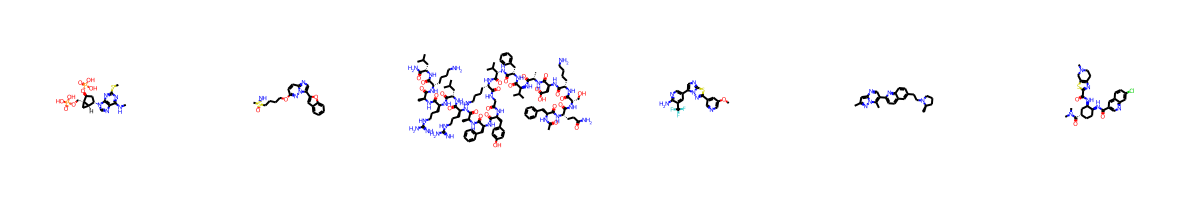

In [6]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in idg_sample.cansmi], molsPerRow=6)

* __LINCS__

In [7]:
lincs_sample = pd.read_sql("SELECT * FROM lincs WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
lincs_sample

,id,pert_name,target,moa,smiles,inchi_key,compound_aliases,sig_count,cansmi,mol_id
0,BRD-K52416366,BRD-K52416366,None,None,COCC(=O)Nc1ccc2OC[C@H](C)N(Cc3cncnc3)C[C@H](C)...,None,None,1,COCC(=O)Nc1ccc2c(c1)C(=O)N(C)C[C@@H](OC)[C@@H]...,39399
1,BRD-K60841303,BRD-K60841303,None,None,C[C@@H](CO)N1C[C@@H](C)[C@@H](CN(C)C(=O)Nc2ccc...,AAENOGRDWGDRJO-PHVLTXCSSA-N,None,3,C[C@@H](CO)N1C[C@@H](C)[C@@H](CN(C)C(=O)Nc2ccc...,29312
2,BRD-K84091085,BRD-K84091085,None,None,C[C@H](CO)N1C[C@H](C)[C@H](CN(C)C(=O)CCC(F)(F)...,QYHFPUZBYVVXLB-MVPDCNEZSA-N,None,15,C[C@H]1CCCCO[C@@H](CN(C)C(=O)CCC(F)(F)F)[C@@H]...,45857
3,BRD-K09454191,BRD-K09454191,None,None,C[C@@H](CO)N1C[C@@H](C)[C@@H](CN(C)C(=O)Nc2ccc...,None,None,3,C[C@H]1CCCCO[C@H](CN(C)C(=O)Nc2ccc(F)cc2)[C@H]...,34389
4,BRD-K60520051,BRD-K60520051,None,None,C[C@@H](CO)N1C[C@@H](C)[C@H](CN(C)C(=O)Nc2c(C)...,ZMFVFBQYBHAIKE-VCBZYWHSSA-N,None,3,Cc1noc(C)c1NC(=O)N(C)C[C@@H]1OCc2cn(nn2)CCCC(=...,30706
5,BRD-K02315366,BRD-K02315366,None,None,COc1ccc(CN(C)C[C@@H]2Oc3ccc(NC(=O)Cc4ccccc4)cc...,RZTDCHBKGWJHSA-JWUQWVJQSA-N,None,2,COc1ccc(CN(C)C[C@@H]2Oc3ccc(NC(=O)Cc4ccccc4)cc...,40980


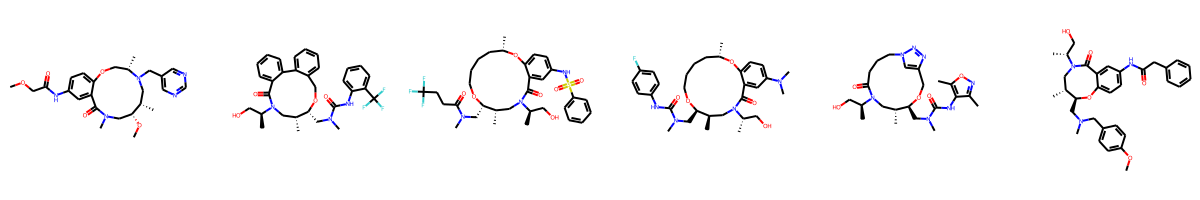

In [8]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in lincs_sample.cansmi], molsPerRow=6)

* __RefMet__

In [9]:
refmet_sample = pd.read_sql("SELECT * FROM refmet WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
refmet_sample

,refmet_name,super_class,main_class,sub_class,formula,exactmass,inchi_key,smiles,pubchem_cid,cansmi,mol_id
0,Glycitin,Polyketides,Flavonoids,Isoflavonoid O-glycosides,C22H22O10,446.1213,OZBAVEKZGSOMOJ-UXICCRDHSA-N,COc1cc2C(=O)C(=COc2cc1O[C@@H]1OC(CO)[C@@H](O)[...,24211990,COc1cc2c(=O)c(-c3ccc(O)cc3)coc2cc1O[C@@H]1OC(C...,20360
1,Cer 18:0;O2/21:0,Sphingolipids,Ceramides,DHCer,C39H79NO3,609.605994,UENBFMKLOLVHJY-QPPIDDCLSA-N,CCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](CO)[C@H](O)CC...,87792472,CCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](CO)[C@H](O)CC...,22094
2,PC O-18:0/22:0,Glycerophospholipids,Glycerophosphocholines,O-PC,C48H98NO7P,831.708092,UWZMUJQZEJOLID-QZNUWAOFSA-N,C[N+](C)(C)CCOP([O-])(=O)OC[C@@H](COCCCCCCCCCC...,24779336,CCCCCCCCCCCCCCCCCCCCCC(=O)O[C@H](COCCCCCCCCCCC...,7448
3,Streptomycin,Organic oxygen compounds,Cyclic alcohols,Cyclitols,C21H39N7O12,581.265673,UCSJYZPVAKXKNQ-HZYVHMACSA-N,C[C@@H]1O[C@@H](O[C@@H]2[C@@H](NC(N)=N)[C@H](O...,19649,CN[C@@H]1[C@H](O[C@H]2[C@H](O[C@@H]3[C@@H](NC(...,18754
4,Trp-Asn-Ile,Organic acids,Amino acids and peptides,Tripeptides,C21H29N5O5,431.21687000000003,LAIUAVGWZYTBKN-VHWLVUOQSA-N,C[C@@H](CC)[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@...,101956149,CC[C@H](C)[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@...,17257
5,Arg-Cys-Ala,Organic acids,Amino acids and peptides,Tripeptides,C12H24N6O4S,348.15797599999996,DQNLFLGFZAUIOW-FXQIFTODSA-N,C[C@@H](NC(=O)[C@@H](CS)NC(=O)[C@H](N)CCCNC(N)...,101727674,C[C@@H](NC(=O)[C@@H](CS)NC(=O)[C@H](N)CCCNC(=N...,10626


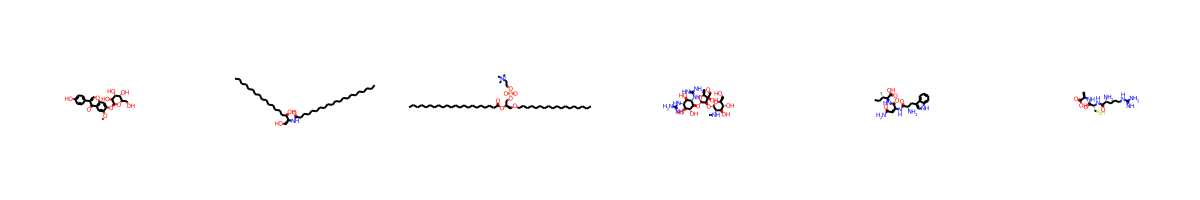

In [10]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in refmet_sample.cansmi], molsPerRow=6)

* __GlyGen__

In [11]:
glygen_sample = pd.read_sql("SELECT * FROM glygen WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
glygen_sample

,glycan_type,mass_pme,number_monosaccharides,fully_determined,wurcs,byonic,glytoucan_ac,missing_score,glycam,inchi,...,smiles,mass,glygen_id,inchi_key,glytoucan_id,pubchem_cid,pubchem_sid,chebi_id,cansmi,mol_id
0,Saccharide,843.45,4,yes,"WURCS=2.0/3,4,3/[a2122h-1a_1-5_2*NCC/3=O][a122...",Hex(1)HexNAc(1)dHex(2) % 675.258578545,G82236PZ,0,LFucpa1-2DGalpb1-4[LFucpa1-3]DGlcpNAca1-OH,InChI=1S/C26H45NO19/c1-6-12(31)15(34)18(37)24(...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)O[C@@H]2[C...,675.26,33087,SRHNADOZAAWYLV-RNZSTKBHSA-N,G82236PZ,191579.0,252281646.0,154234.0,CC(=O)N[C@H]1[C@@H](O)O[C@H](CO)[C@@H](O[C@@H]...,306919
1,Saccharide,1683.86,7,nan,"WURCS=2.0/5,7,6/[a2112h-1x_1-5][a2122h-1b_1-5_...",Hex(3)HexNAc(2)dHex(1)NeuAc(1) % 1347.48110591,G71871QF,99,nan,InChI=1S/C51H85N3O38/c1-12-26(66)32(72)33(73)4...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)O[C@@H]2[C...,1347.48,4120,IFWQQVHSJRGTIC-ZWAWFBQXSA-N,G71871QF,91861195.0,252295148.0,153233.0,CC(=O)N[C@H]1[C@H](O[C@H]2[C@@H](O)[C@@H](CO)O...,303901
2,Saccharide,3841.93,16,yes,"WURCS=2.0/6,16,15/[a2122h-1b_1-5_2*NCC/3=O][a1...",Hex(7)HexNAc(6)dHex(1)NeuAc(2) % 3099.10530697,G40194MN,0,DNeup5Aca2-3DGalpb1-4DGlcpNAcb1-2[DNeup5Aca2-3...,InChI=1S/C118H194N8O86/c1-27-61(151)76(166)80(...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)OC[C@@H]2[...,3099.11,5969,JQMKQGFYQXPWPR-HGQOWBQTSA-N,G40194MN,91852299.0,252284504.0,150075.0,CC(=O)N[C@H]1[C@H](O[C@@H]2[C@@H](OC[C@H]3O[C@...,306663
3,Saccharide,454.24,2,nan,"WURCS=2.0/2,2,1/[a1122h-1x_1-5][a2112h-1b_1-5]...",Hex(2) % 342.1162117,G89854FG,349,nan,InChI=1S/C12H22O11/c13-1-3-5(14)8(17)10(19)12(...,...,C([C@@H]1[C@@H]([C@@H]([C@H]([C@@H](O1)OC[C@@H...,342.12,18744,DLRVVLDZNNYCBX-LXWPXHRFSA-N,G89854FG,11493885.0,252289052.0,154693.0,OC[C@H]1O[C@@H](OC[C@H]2OC(O)[C@@H](O)[C@@H](O...,302190
4,Saccharide,1468.74,6,yes,"WURCS=2.0/5,6,5/[a2122h-1b_1-5][a2112h-1b_1-5]...",Hex(4)HexNAc(1)NeuAc(1) % 1160.39664794,G88188VJ,0,DGalpa1-4DGalpb1-3DGalpNAcb1-4[DNeup5Aca2-3]DG...,InChI=1S/C43H72N2O34/c1-10(52)44-19-12(54)3-43...,...,CC(=O)N[C@@H]1[C@H](C[C@@](O[C@H]1[C@@H]([C@@H...,1160.40,19596,ANVCYUKMNJMQTD-CPUBSOLGSA-N,G88188VJ,91857929.0,252291232.0,155021.0,CC(=O)N[C@@H]1[C@@H](O)C[C@](O[C@H]2[C@@H](O[C...,304588
5,Saccharide,1526.78,7,nan,"WURCS=2.0/4,7,6/[a2122h-1x_1-5][a2112h-1b_1-5]...",Hex(4)HexNAc(2)dHex(1) % 1218.43851278,G25846VM,99,nan,InChI=1S/C46H78N2O35/c1-10-21(55)27(61)33(67)4...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)O[C@@H]2[C...,1218.44,7612,ZOWXNILTUYEOOS-BMIWBPQLSA-N,G25846VM,71609365.0,252288148.0,148537.0,CC(=O)N[C@H]1[C@H](O[C@H]2[C@@H](O)[C@@H](CO[C...,307795


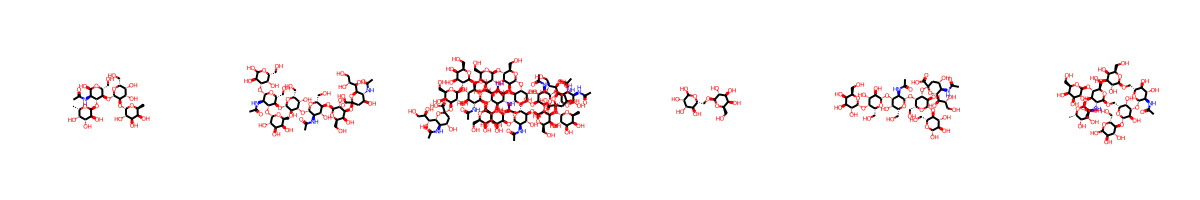

In [12]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in glygen_sample.cansmi], molsPerRow=6)

* __ReproTox__

In [13]:
reprotox_sample = pd.read_sql("SELECT * FROM reprotox WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
reprotox_sample

,ls_id,cas_rn,pubchem_cid,smiles,term,cansmi,mol_id
0,LS-78658,13551-87-6,26105,COCC(O)Cn1ccnc1[N+]([O-])=O,CNS,COCC(O)Cn1ccnc1[N+](=O)[O-],298062
1,LS-138803,2687-91-4,17595,CCN1CCCC1=O,CV,CCN1CCCC1=O,298117
2,LS-702,126-07-8,441140,COC1=CC(=O)C[C@@H](C)[C@]11Oc2c(C1=O)c(OC)cc(O...,CNS,COC1=CC(=O)C[C@@H](C)[C@]12Oc1c(Cl)c(OC)cc(OC)...,19124
3,LS-43040,395-28-8,3783,CC(COc1ccccc1)NC(C)C(O)c1ccc(O)cc1,CV,CC(COc1ccccc1)NC(C)C(O)c1ccc(O)cc1,30801
4,LS-1317,51-79-6,5641,CCOC(N)=O,CNS,CCOC(N)=O,9616
5,LS-7280,518-75-2,54680783,C[C@H]1OC=C2C(O)=C(C(O)=O)C(=O)C(C)=C2[C@@H]1C,CNS,CC1=C2C(=CO[C@H](C)[C@H]2C)C(O)=C(C(=O)O)C1=O,298150


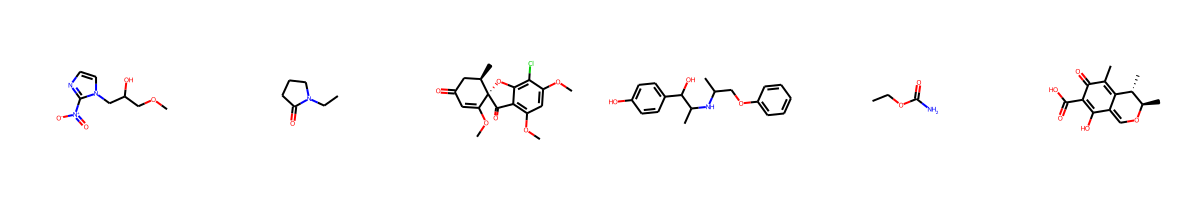

In [14]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in reprotox_sample.cansmi], molsPerRow=6)

### Chemical similarity search

In [15]:
hits = rdktools.db.MolSimilaritySearch("NCCc1cc(O)c(O)cc1", "mols", dbcon)
hits.head(12)

,cansmi,name,tanimoto
0,Cl.NCCc1ccc(O)c(O)c1,None,1.000000
1,NCCc1ccc(O)c(O)c1,None,1.000000
2,NCCc1cc(O)c(O)c(O)c1,None,0.921986
3,NCCc1cccc(O)c1,None,0.853846
4,CC(=O)NCCc1ccc(O)c(O)c1,None,0.817610
5,OCCc1ccc(O)c(O)c1,None,0.784722
6,NCCc1cc(O)c(O)cc1O,None,0.778443
7,Cl.NCCc1cc(O)c(O)cc1O,None,0.778443
8,O=CCc1ccc(O)c(O)c1,None,0.773973
9,COc1cc(CCN)ccc1O,None,0.773810


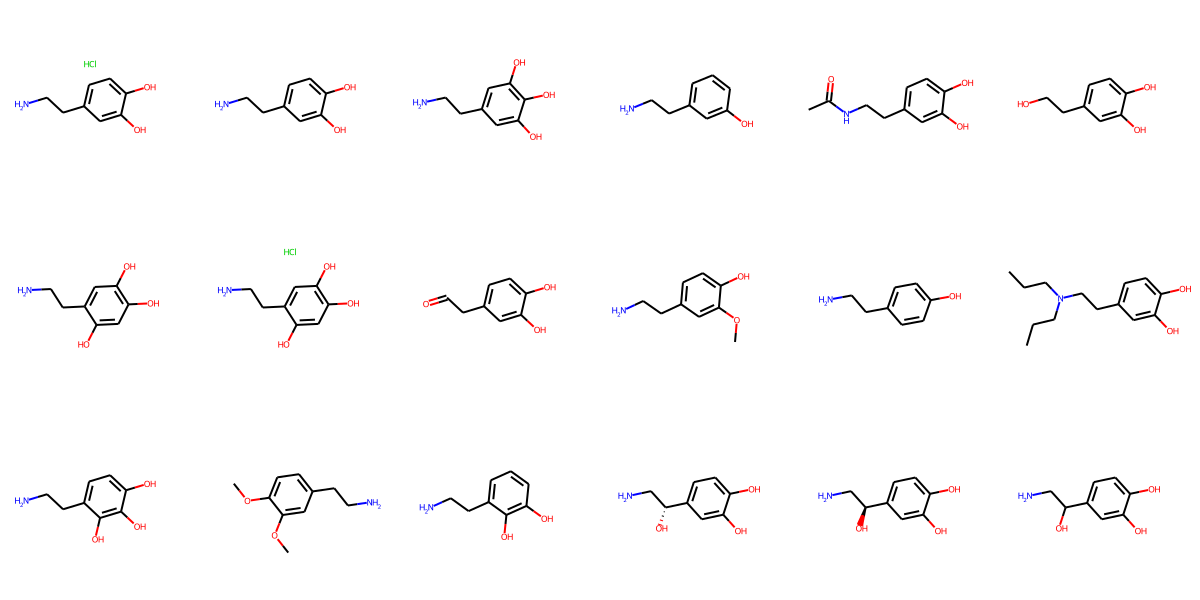

In [16]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in hits.cansmi[:18]], molsPerRow=6)

## Cansmi commonality

Comparing datasets by canonical SMILES.

In [17]:
cansmis={};
for table in ("idg", "lincs", "glygen", "refmet", "reprotox"):
  cansmis[table] = set(pd.read_sql(f"SELECT DISTINCT cansmi FROM {table} WHERE cansmi IS NOT NULL", dbcon)["cansmi"])
  print(f"{table:>12}: {len(cansmis[table]):6d} cansmis")

         idg: 249512 cansmis
       lincs:  26821 cansmis
      glygen:   9695 cansmis
      refmet:  23114 cansmis
    reprotox:    698 cansmis


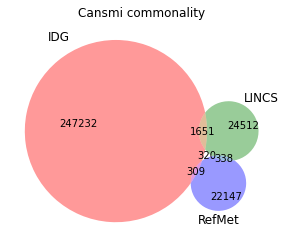

In [23]:
v3 = venn3([cansmis["idg"], cansmis["lincs"], cansmis["refmet"]], ('IDG', 'LINCS', 'RefMet'), set_colors=("r", "g", "b"), alpha=0.4)
plt.title("Cansmi commonality")
plt.show()

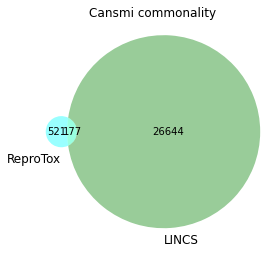

In [25]:
plt.figure(figsize=(8,4))
v2 = venn2([cansmis["reprotox"], cansmis["lincs"]], ('ReproTox', 'LINCS'), set_colors=("cyan", "g"), normalize_to=2)
plt.title("Cansmi commonality")
plt.show()